<a href="https://colab.research.google.com/github/azdinelaaouissi/ML/blob/main/RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import  numpy   as  np
from  sklearn.datasets  import  make_regression
import matplotlib.pyplot as plt


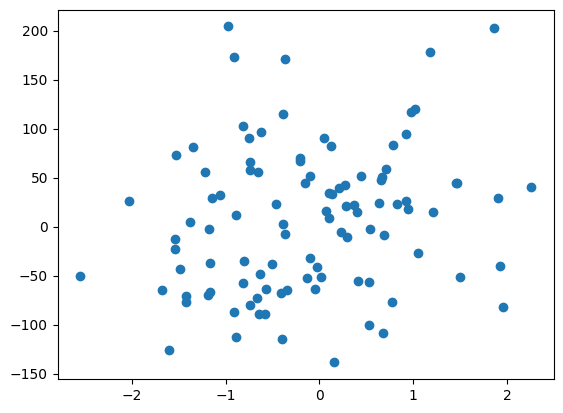

In [65]:
np.random.seed(0)
x,y=make_regression(n_samples=100,n_features=3,noise=10)
plt.scatter(x[:,1],y)

In [66]:
y=y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(100, 3)
(100, 1)


In [69]:
X=np.hstack((x,np.ones((x.shape[0],1))))


In [70]:
theta = np.random.randn(4, 1)
theta

array([[-0.5028167 ],
       [ 2.41245368],
       [-0.96050438],
       [-0.79311736]])

In [71]:
def  model(X,theta):
  return  X.dot(theta)


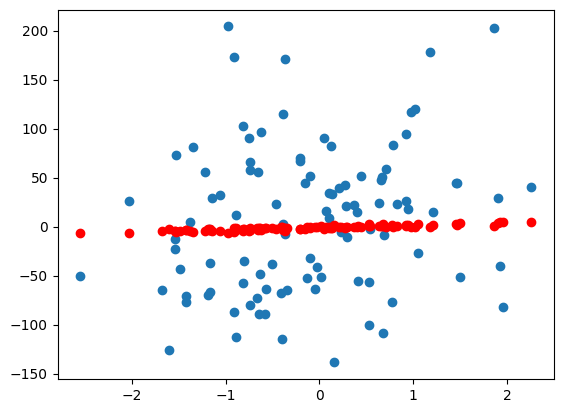

In [73]:
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], model(X, theta), c='r')

In [74]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [75]:
cost_function(X,y,theta)

2808.9589040385213

In [83]:
cost_function(X,y,theta_final)

46.193668719875205

In [77]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history


In [78]:
n_iterations = 1000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [79]:
theta_final

array([[40.21332579],
       [ 8.11098869],
       [61.7327945 ],
       [-2.39091985]])

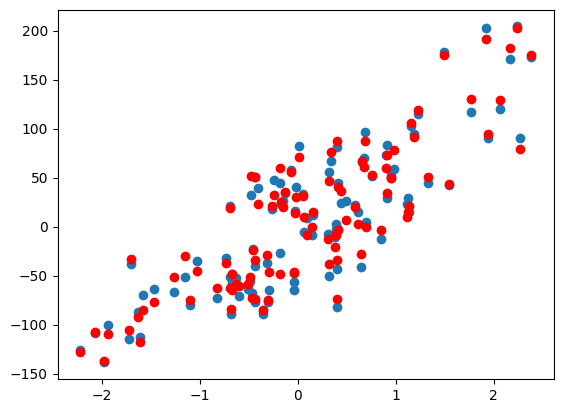

In [81]:
plt.scatter(x[:,2], y)
plt.scatter(x[:,2], model(X, theta_final), c='r')

In [55]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [82]:
coef_determination(y,model(X, theta_final))

0.983059970772755

Erreur quadratique moyenne (MSE) : 105.41664573404944


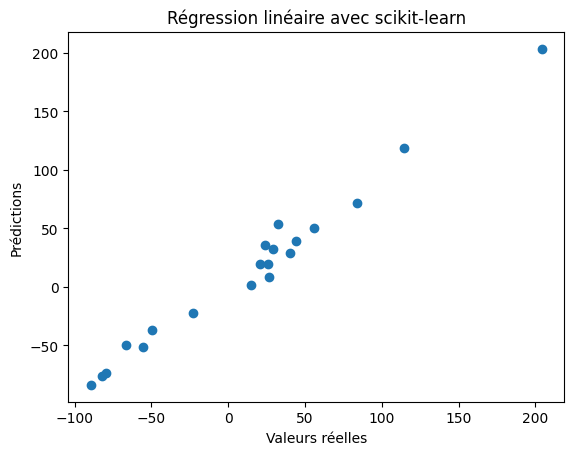

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Génération de données synthétiques pour la régression linéaire
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=0)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Affichage des résultats
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Régression linéaire avec scikit-learn')
plt.show()
